เราจะดูการคำนวณเกี่ยวกับ vector คร่าว ๆ โดยเราจะเขียนฟังก์ชันต่าง ๆ โดยใช้ list เก็บ vector ฟังก์ชันที่เราจะเขียนมีดังนี้
* การคูณด้วย scalar: `scalar_mult`
* การบวกลบ vector: `vadd`, `vsub`

และเราจะทดลองวาดกราฟของการประมวลผลเหล่านี้

In [48]:
# เราจะเก็บ vector ด้วยลิสต์
v1 = [1,2,3]


ด้านล่างเป็นฟังก์ชัน `scalar_mult`  ในการคูณ vector `v` ด้วย scalar `a` เราจะคูณทุก ๆ element ของ `v` ด้วย `a`  โค้ดด้านล่างเขียนด้วย list comprehension ใน Python

In [49]:
def scalar_mult(a, v):
    return [a*x for x in v]

In [50]:
scalar_mult(10, v1)

[10, 20, 30]

เราจะเขียนฟังก์ชัน `vadd` และ `vsub` โดยคุณจะต้องเขียนฟังก์ชัน `vsub` เอง เราสมมติว่า vector ที่ส่งให้ฟังก์ชันทั้งสองมีขนาดเท่ากัน

In [51]:
def vadd(v1, v2):
    return [v1[i] + v2[i] for i in range(len(v1))]

In [52]:
v2 = [5,10,35]
vadd(v1, v2)

[6, 12, 38]

### >>> งาน 1.1 `vsub`

In [53]:
# งานของคุณ: เขียนฟังก์ชัน vsub ให้สมบูรณ์
# ทดลองเขียนโดยใช้ scalar_mult กับ vadd
def vsub(v1, v2):
    return [v1[i] - v2[i] for i in range(len(v1))]

In [54]:
# ถ้า vsub ถูกต้อง ผลลัพธ์ควรเท่ากับ [-4, -8, -32]

vsub(v1, v2)

[-4, -8, -32]

ในส่วนถัดไปเราจะทดลองวาด vector  โดยเราจะสนใจเวกเตอร์ในสองมิติเป็นหลัก

In [55]:
import matplotlib.pyplot as plt

ฟังก์ชัน `plot_vectors` จะวาดรายการของเวกเตอร์ โดยมีจุดเริ่มของทุกเวกเตอร์ที่ (0,0) เพื่อความง่ายในการพิจารณาต้อง `scale` ให้เหมาะสม ค่า `scale` ระบุว่าหนึ่งหน่วยของ vector จะยาวเท่าใดของการวาด

In [56]:
def plot_vectors(vectors, scale):
    xcomp = [v[0] for v in vectors]
    ycomp = [v[1] for v in vectors]

    plt.quiver([0]*len(vectors), [0]*len(vectors), xcomp, ycomp, scale=scale)
    plt.show()

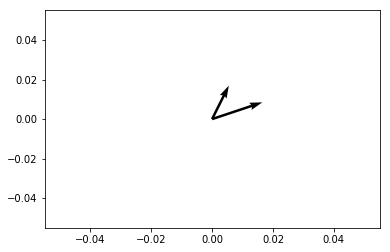

In [57]:
v1 = [1,2]
v2 = [3,1]
vectors = [v1,v2]
plot_vectors(vectors, 20)

In [58]:
# ด้านล่างเราคำนวณผลคูณของ 0.1, 0.2, 0.3,..., 1 กับ v1
vectors = [scalar_mult(a/10, v1) for a in range(1,10)]

### >>> งาน 1.2 ทดลองเรียก `plot_vectors`

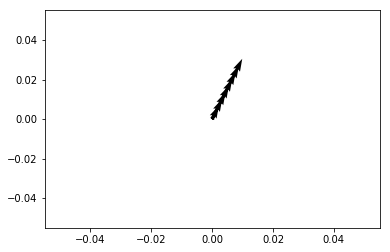

In [59]:
# งานของคุณ: สั่งวาดกราฟ เลือกสเกลให้เหมาะสม
plot_vectors(vectors, 10)

เราจะทดลองวาด convex combination ของ v1 และ v2

In [60]:
alphas = [a/10 for a in range(1,10)]
alphas

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

## Convex combination

Convex combination ของเซตของเวกเตอร์ คือ linear combination ของเซตของเวกเตอร์ที่ค่าสัมประสิทธิ์ทุกตัวมีค่าไม่น้อยกว่าศูนย์ และมีผลรวมของสัมประสิทธิ์เท่ากับ 1

### >>> งาน 1.3 คำนวณ convex combination

In [66]:
# งานของคุณ: แก้คำสั่งด้านล่างให้คำนวณ convex combination ของ v1 กับ v2 โดยใช้ alphas เป็นสัมประสิทธิ์
# ให้เรียกใช้ `scalar_mult`, `vadd` ได้
# cvectors = [[0,0] for a in alphas]
cvectors = [vadd(scalar_mult(1-a,v1),scalar_mult(a,v2)) for a in alphas]

In [67]:
cvectors

[[1.2000000000000002, 1.9000000000000001],
 [1.4000000000000001, 1.8],
 [1.5999999999999999, 1.7],
 [1.8000000000000003, 1.6],
 [2.0, 1.5],
 [2.1999999999999997, 1.4],
 [2.3999999999999995, 1.3],
 [2.6000000000000005, 1.2],
 [2.8000000000000003, 1.1]]

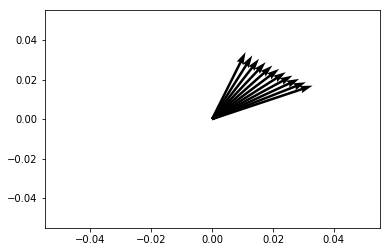

In [68]:
plot_vectors([v1,v2] + cvectors, 10)

## Linear combination

เราจะทดลองสร้าง linear combination ของ vector `v1` และ `v2` แบบง่าย ๆ โดยเราจะทยอยคูณ `v1` และ `v2` ด้วยค่า -1, -0.9, ..., 0.9, 1 และวาดผลลัพธ์ออกมา  อย่างไรก็ตาม การวาดเป็นเส้นลูกศรจะทำให้ดูลำบาก เราเลือกจะใช้ scatter plot แทน

### >>> งาน 1.4 คำนวณ linear combination

In [76]:
vectors = []
for a in range(-10,10):
    for b in range(-10,10):
        # งานของคุณ: คำนวณ linear combination ของ v1 และ v2 โดยใช้ a/10 กับ b/10 เป็นสัมประสิทธิ์ ใส่ใน v
        # ใช้ scalar_mult กับ vadd ได้
        v = vadd(scalar_mult(a/10,v1),scalar_mult(b/10,v2))
        vectors.append(v)

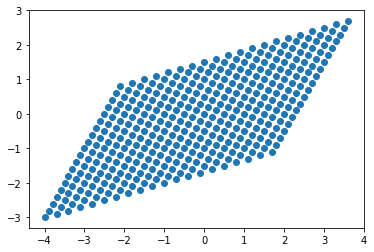

In [77]:
plt.scatter([v[0] for v in vectors], [v[1] for v in vectors])